In [14]:
import cv2
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

In [15]:

CHECKERBOARD = (6,8)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

objpoints = []

imgpoints = [] 

reprojection_errors = [] 

objp = np.zeros((1, CHECKERBOARD[0]*CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None

In [16]:

images = glob.glob('./Images_Real/*.jpg')
counter = 0
for fname in images:
    h,w = img.shape[:2]
    # print(h,w)
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH+
    	cv2.CALIB_CB_FAST_CHECK+cv2.CALIB_CB_NORMALIZE_IMAGE)
    # print(ret)

    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        
        imgpoints.append(corners2)

        img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2,ret)
    
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    new_camera_matrix, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

    imgpoints_reproj, _ = cv2.projectPoints(objp, rvecs[0], tvecs[0], mtx, dist)


    error = cv2.norm(imgpoints[0], imgpoints_reproj, cv2.NORM_L2) / len(imgpoints_reproj)
    reprojection_errors.append(error)

# cv2.destroyAllWindows()

h,w = img.shape[:2]

In [ ]:
# print(objpoints)
# print(imgpoints)

Report the Extrinsic and Instric parameters of the camera

In [17]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

focal_length_x = mtx[0, 0]
focal_length_y = mtx[1, 1]
print("Focal length x :\n", focal_length_x)
print("Focal length y :\n", focal_length_y)
print()

skew_parameter = mtx[0, 1]
print("Skew :\n", skew_parameter)

principal_point_x = mtx[0, 2]
principal_point_y = mtx[1, 2]
print("Principal point x :\n",principal_point_x)
print("Principal point y :\n",principal_point_y)
print()

print("dist :\n")
print(dist)
print()


print("rvecs :\n")
print(rvecs)
print()

print("tvecs :\n")
print(tvecs)
print()

Focal length x :
 1216.2432556329334
Focal length y :
 1222.4507682931446

Skew :
 0.0
Principal point x :
 312.1504316937009
Principal point y :
 662.9945616876988

dist :

[[ 0.21769632 -1.61993915 -0.04394867 -0.00897205  1.78324818]]

rvecs :

(array([[-0.12559451],
       [-0.32310686],
       [-0.34514483]]), array([[-0.21816131],
       [-0.04109904],
       [ 0.01431506]]), array([[-0.329466  ],
       [ 0.30571556],
       [-0.08869267]]), array([[-0.63299498],
       [-0.1150835 ],
       [ 0.00375456]]), array([[-0.02409251],
       [ 0.42475093],
       [-0.02284235]]), array([[-0.58012568],
       [-0.01975946],
       [ 0.0035959 ]]), array([[-0.38077443],
       [ 0.58678442],
       [ 1.54019608]]), array([[-0.64696465],
       [-0.00939075],
       [-0.01604999]]), array([[-0.8540861 ],
       [ 0.21391169],
       [ 0.17765341]]), array([[-0.83284382],
       [ 0.07996329],
       [-0.42223085]]), array([[-0.72841758],
       [ 0.40397629],
       [ 0.57086835]]), arr

Compute the reprojected corners and find the error for the same for ever image

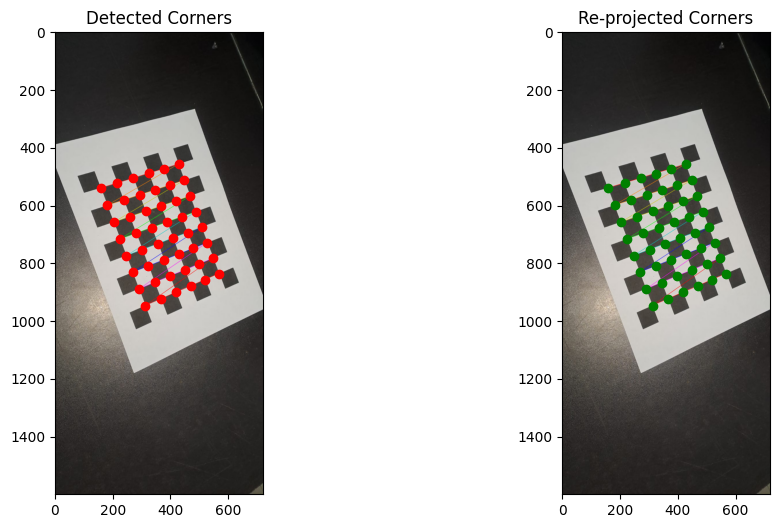

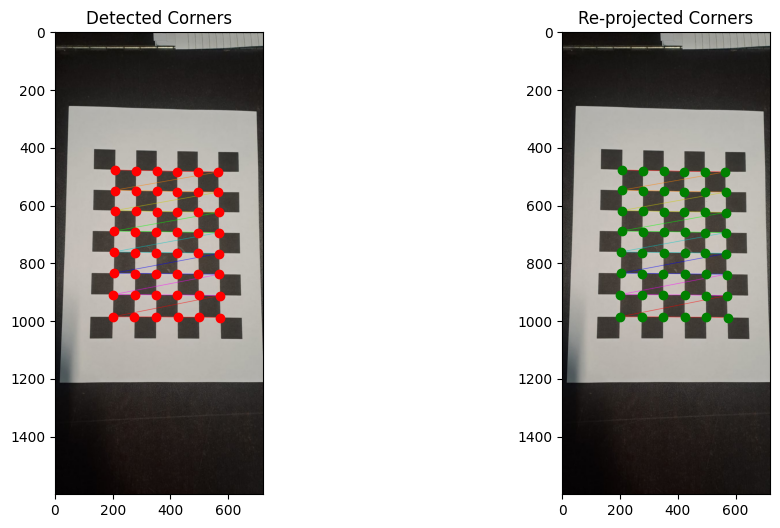

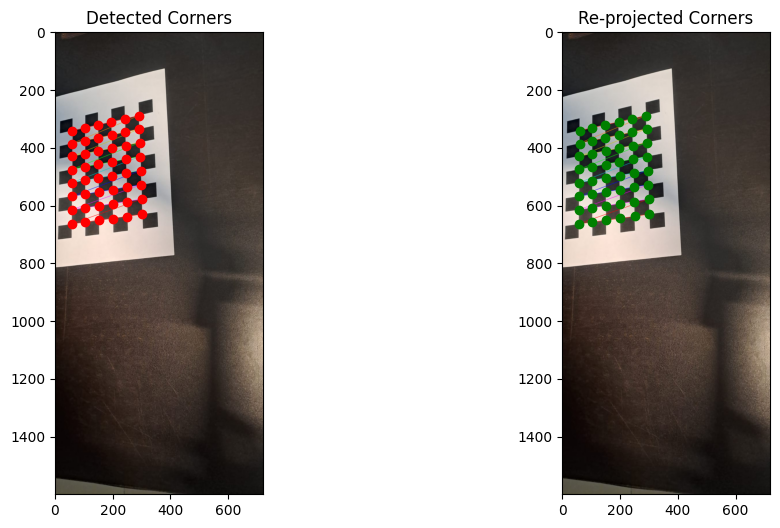

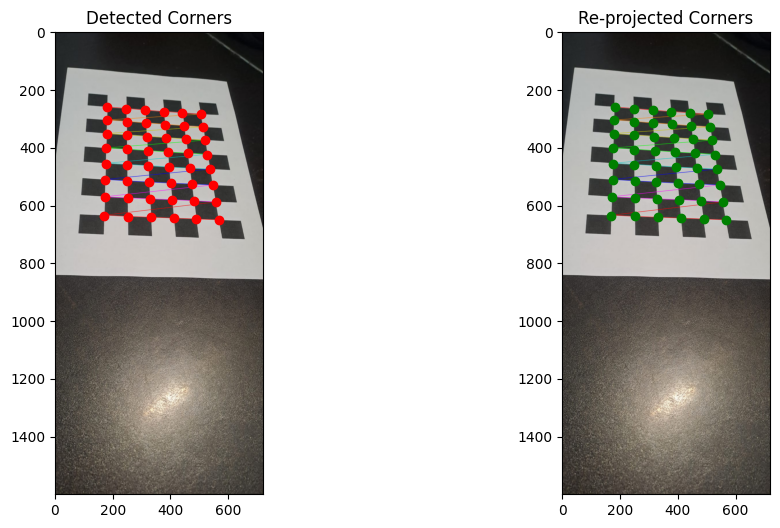

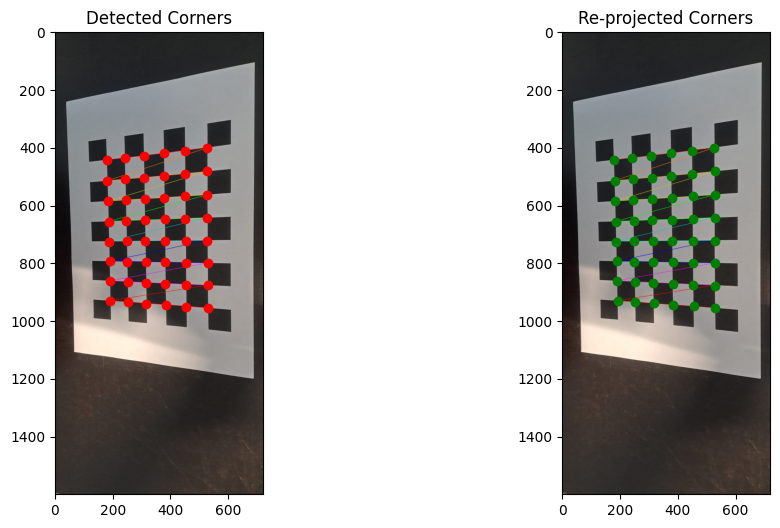

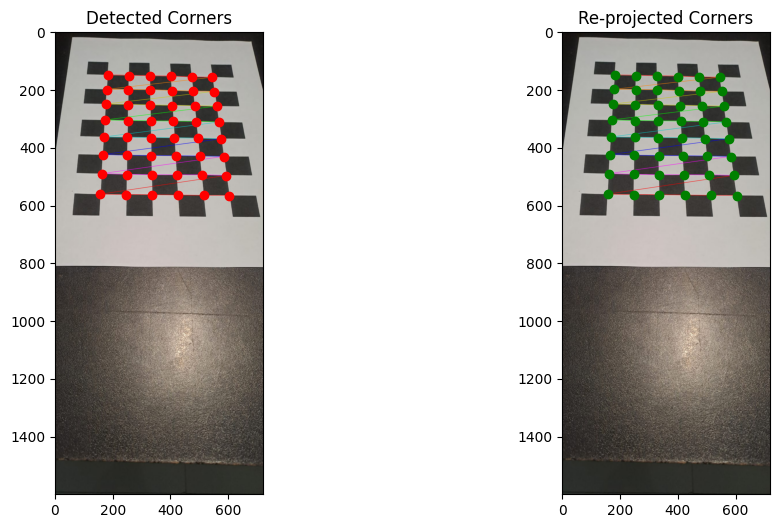

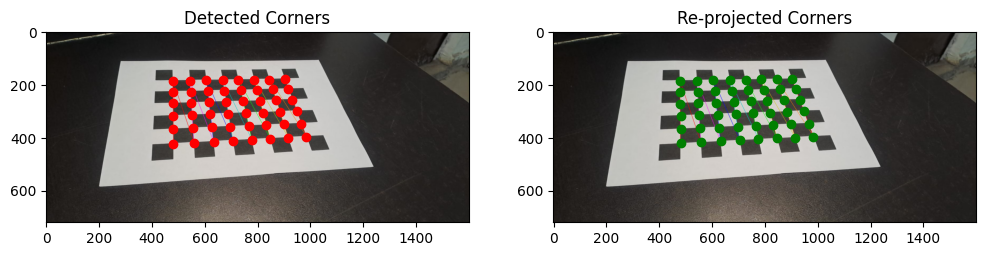

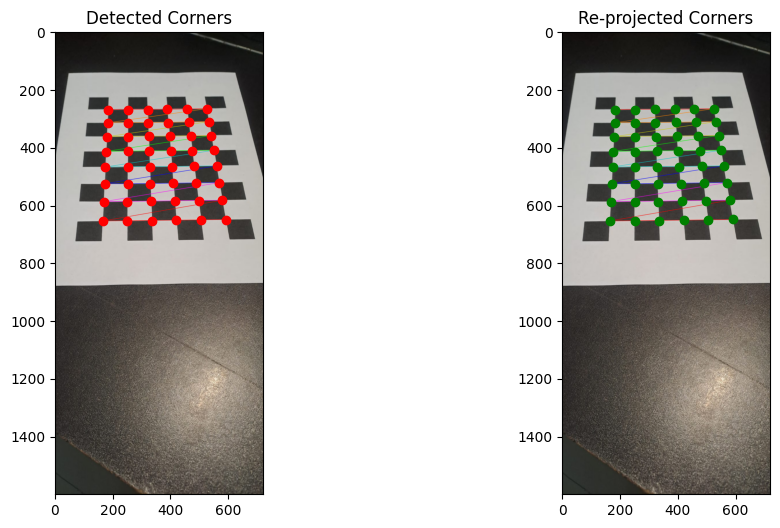

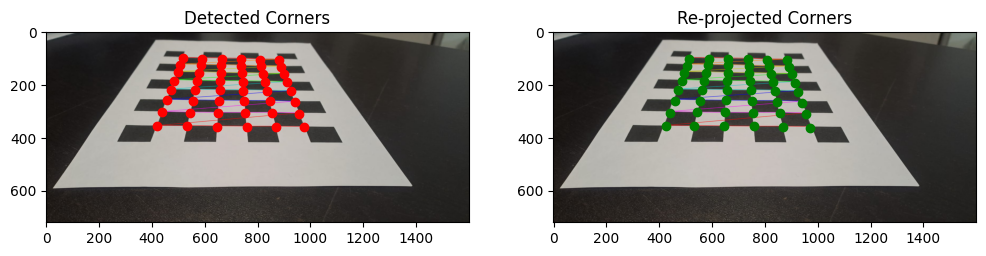

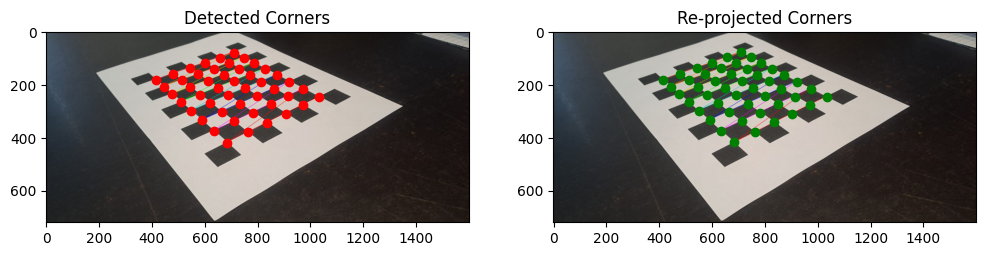

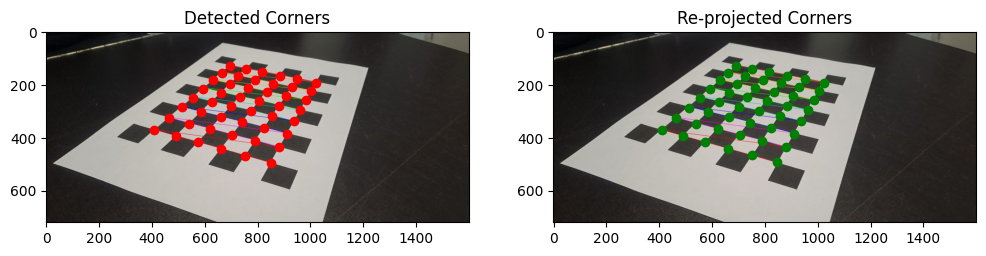

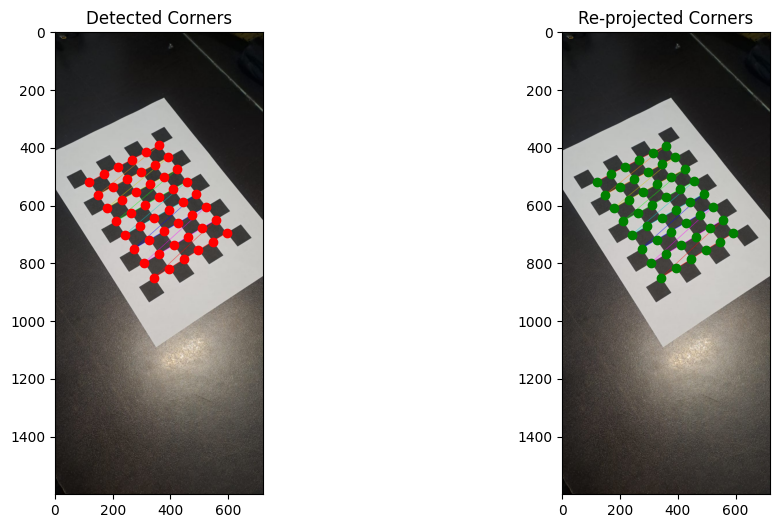

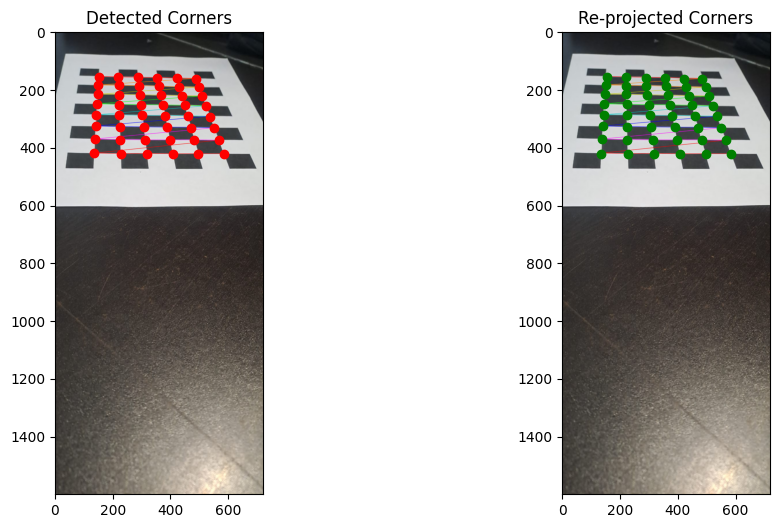

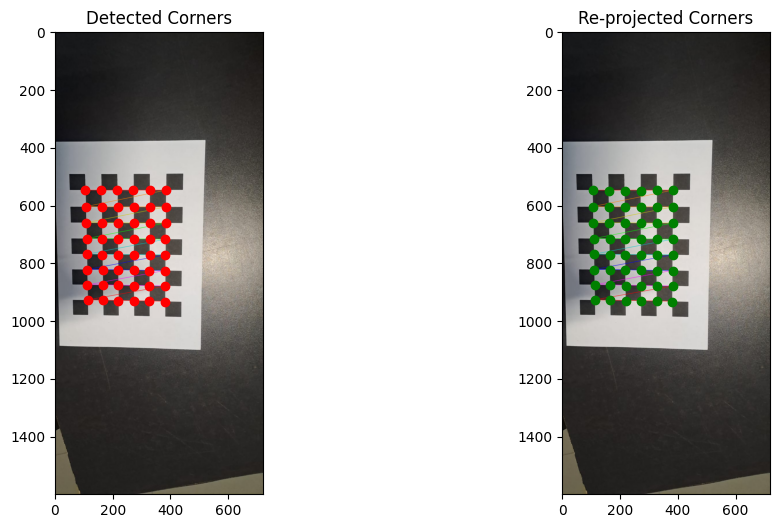

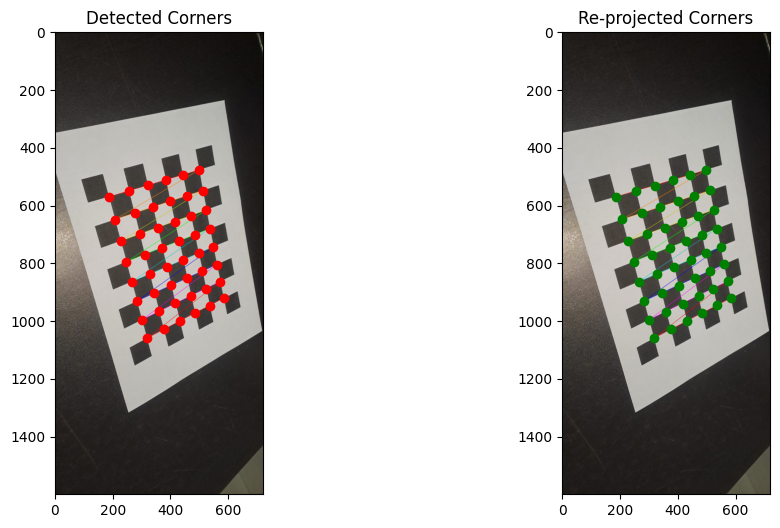

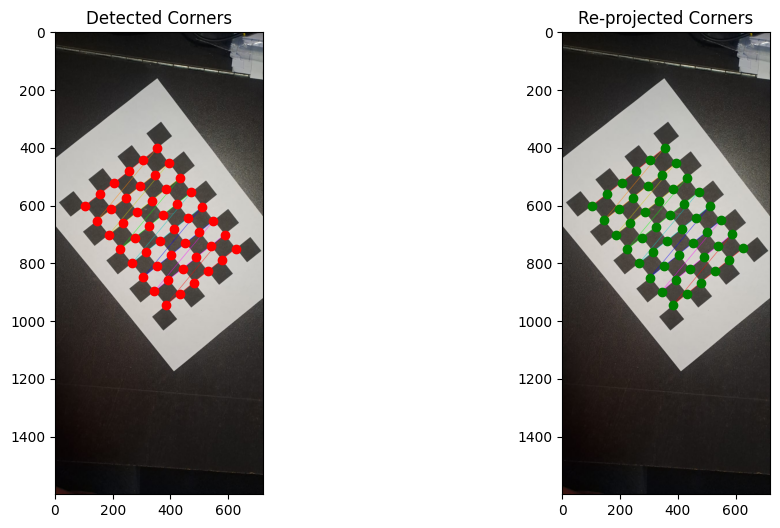

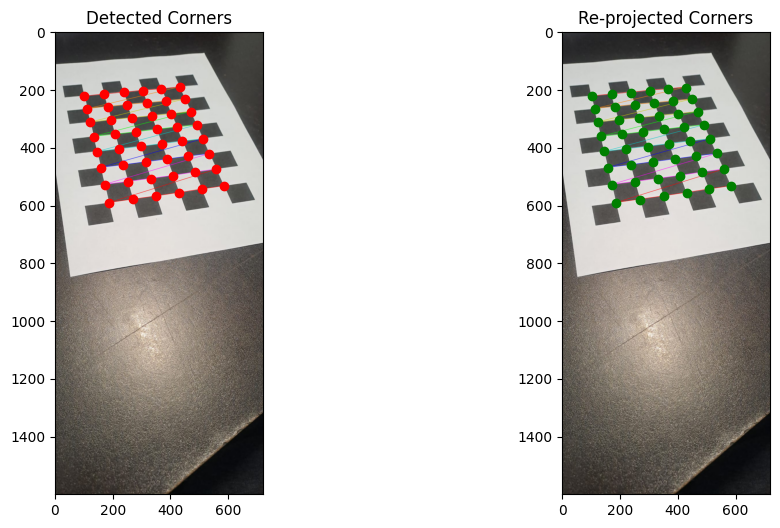

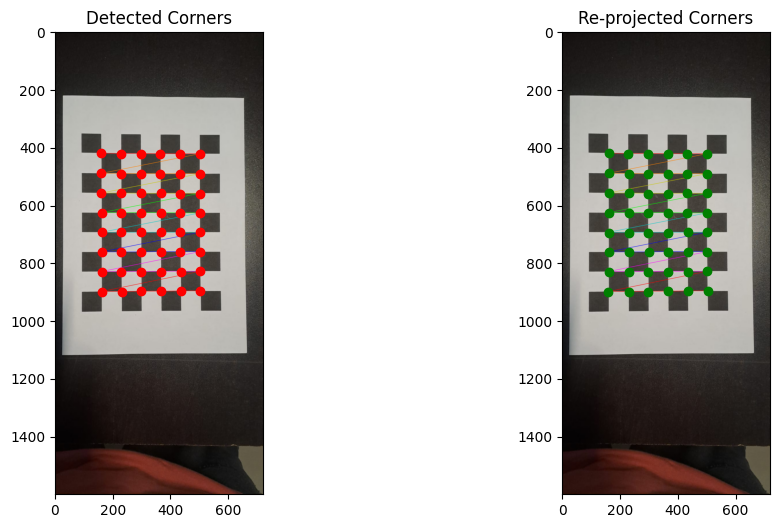

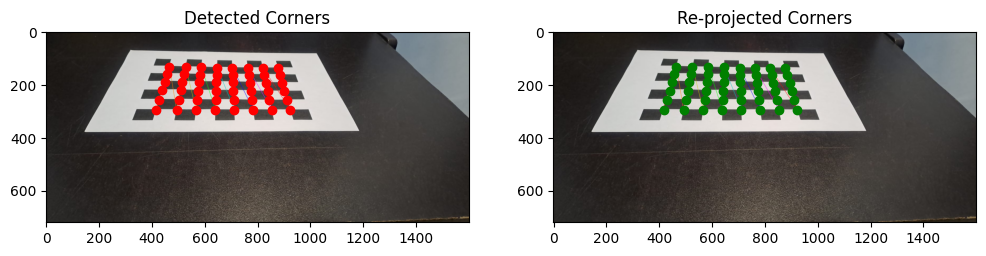

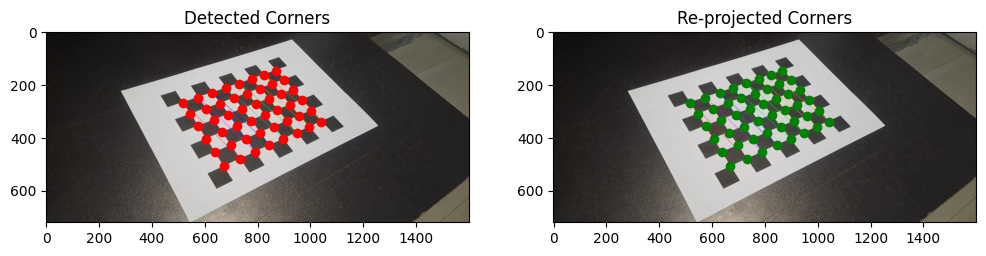

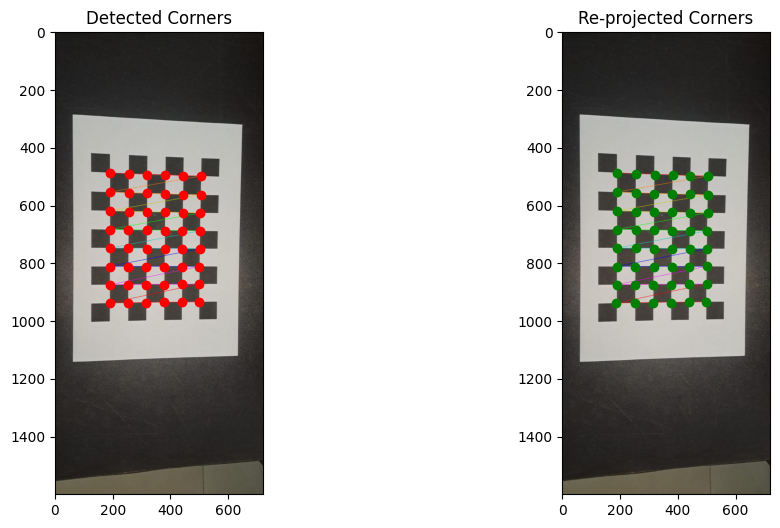

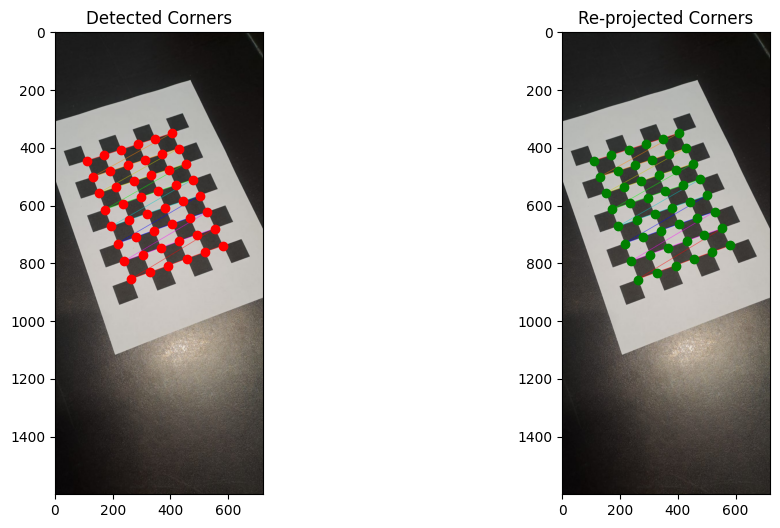

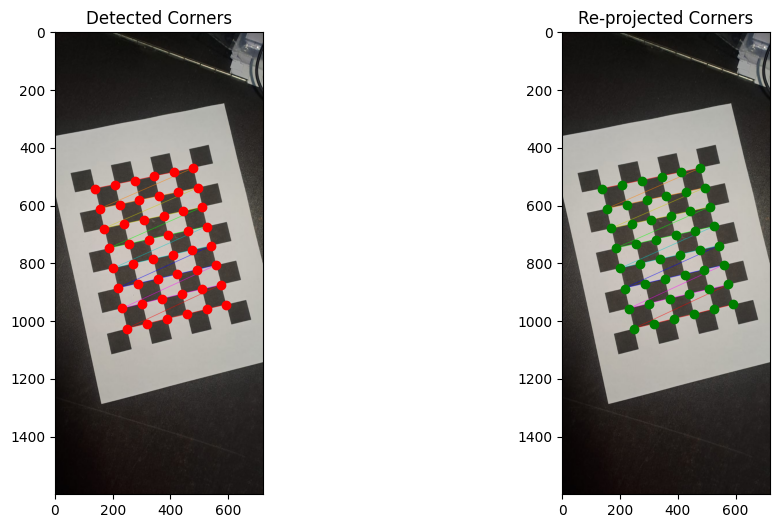

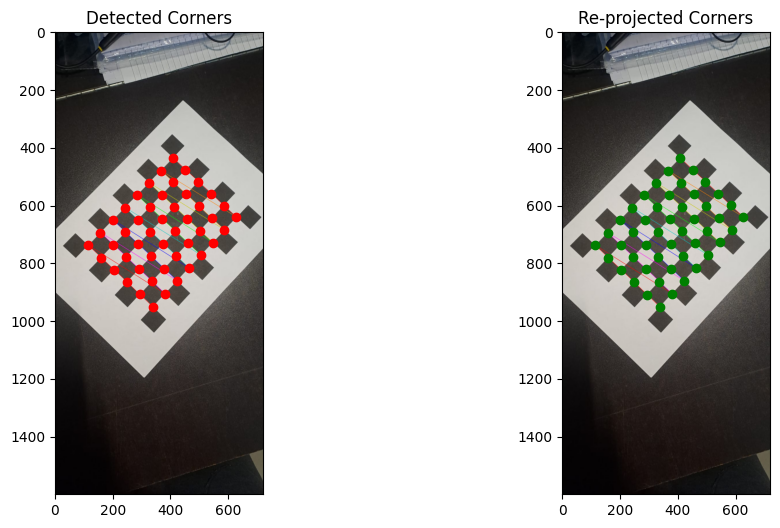

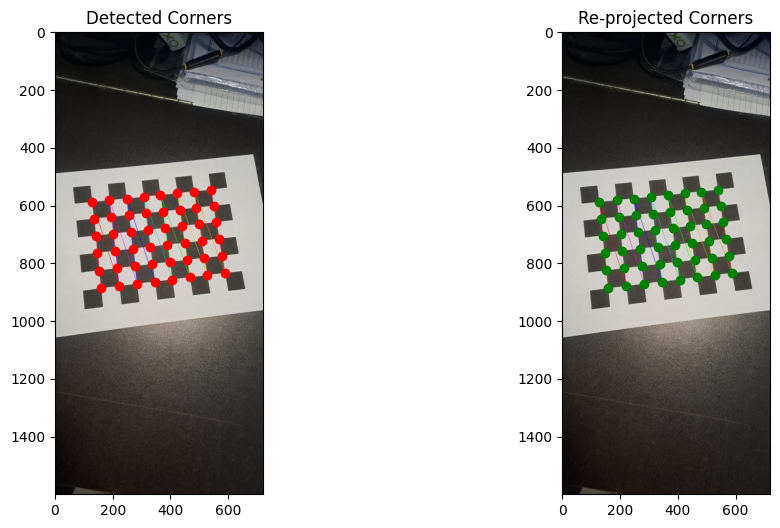

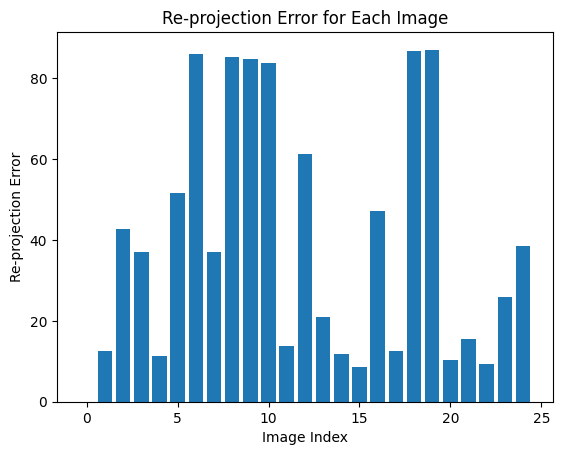

Mean Re-projection Error: 39.308095453250345
Standard Deviation of Re-projection Error: 30.039329912256004
[0.03791091563575022, 12.664281413731729, 42.66025288400089, 37.17419112266092, 11.245045164929378, 51.5600310265589, 86.12227964114304, 37.063659488487524, 85.36113482711461, 84.78048031987221, 83.85815338081001, 13.79303028328578, 61.423927980180174, 20.8974556968849, 11.809585833971253, 8.618482703050779, 47.322712007710436, 12.534217227699665, 86.88542413423482, 87.12222266229152, 10.339315965488039, 15.59434129531123, 9.3653530478241, 26.010159109441847, 38.458738198939194]


In [19]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

# Define the number of inner corners of the chessboard
CHECKERBOARD = (6,8)  # Adjust according to your chessboard

# Criteria for corner refinement
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((CHECKERBOARD[0]*CHECKERBOARD[1],3), np.float32)
objp[:,:2] = np.mgrid[0:CHECKERBOARD[0],0:CHECKERBOARD[1]].T.reshape(-1,2)

# Arrays to store object points and image points from all the images
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
reprojection_errors = [] # To store re-projection errors

# Extracting path of individual image stored in a given directory
images = glob.glob('./Images_Real/*.jpg')
count = 0
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    # If desired number of corners are found in the image then ret = true
    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH+
    	cv2.CALIB_CB_FAST_CHECK+cv2.CALIB_CB_NORMALIZE_IMAGE)
    
    """
    If desired number of corners are detected,
    refine the pixel coordinates and display 
    them on the images of checkerboard
    """
    if ret == True:
        objpoints.append(objp)
        # Refine pixel coordinates for given 2d points
        corners2 = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)

        # Calibrate the camera
        h, w = img.shape[:2]
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
        new_camera_matrix, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

        # Re-project points
        imgpoints_reproj, _ = cv2.projectPoints(objp, rvecs[count], tvecs[count], mtx, dist)
        count += 1

        # Compute re-projection error
        error = cv2.norm(imgpoints[0], imgpoints_reproj, cv2.NORM_L2) / len(imgpoints_reproj)
        reprojection_errors.append(error)

        # Plot corners and re-projected points
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[0].set_title('Detected Corners')
        axes[0].plot(corners2[:, 0, 0], corners2[:, 0, 1], 'ro')  # Detected corners

        axes[1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[1].set_title('Re-projected Corners')
        axes[1].plot(imgpoints_reproj[:, 0, 0], imgpoints_reproj[:, 0, 1], 'go')  # Re-projected corners

        plt.show()

# Plot the re-projection errors
plt.bar(range(len(reprojection_errors)), reprojection_errors)
plt.xlabel('Image Index')
plt.ylabel('Re-projection Error')
plt.title('Re-projection Error for Each Image')
plt.show()

# Report mean and standard deviation of re-projection error
mean_error = np.mean(reprojection_errors)
std_dev_error = np.std(reprojection_errors)
print("Mean Re-projection Error:", mean_error)
print("Standard Deviation of Re-projection Error:", std_dev_error)

print(reprojection_errors)

Undistort 5 of the raw images

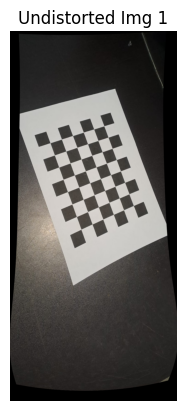

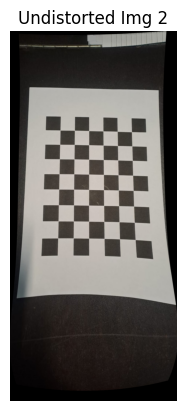

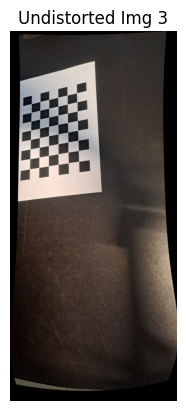

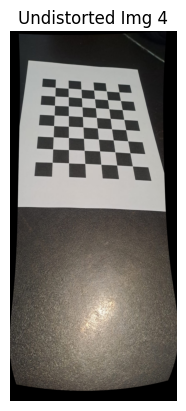

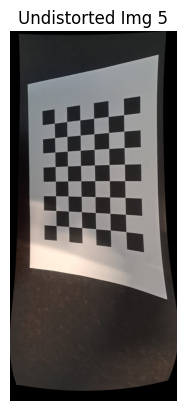

In [20]:
# Undistort 5 of the raw images
count = 1
for fname in images[:5]:
    img = cv2.imread(fname)
    h, w = img.shape[:2]
    new_camera_matrix, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

    # Undistort
    undistorted_img = cv2.undistort(img, mtx, dist, None, new_camera_matrix)
    
    # Display the undistorted image using Matplotlib
    plt.title(f"Undistorted Img {count}")
    plt.imshow(cv2.cvtColor(undistorted_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    count += 1

Find Checkerboard Plane Normals

In [21]:
plane_normals = []
for rvec in rvecs:
    rmat, _ = cv2.Rodrigues(rvec)
    normal = np.dot(rmat, np.array([0, 0, 1]))  
    plane_normals.append(normal)

for i, normal in enumerate(plane_normals):
    print(f"Image {i+1} - Checkerboard Plane Normal: {normal}")

Image 1 - Checkerboard Plane Normal: [-0.28912839  0.17530128  0.94110267]
Image 2 - Checkerboard Plane Normal: [-0.04231596  0.21607339  0.97545971]
Image 3 - Checkerboard Plane Normal: [0.30949034 0.30473991 0.90074931]
Image 4 - Checkerboard Plane Normal: [-0.10845447  0.59001086  0.80007801]
Image 5 - Checkerboard Plane Normal: [0.41228825 0.01859202 0.91086373]
Image 6 - Checkerboard Plane Normal: [-0.01968242  0.54805682  0.8362095 ]
Image 7 - Checkerboard Plane Normal: [0.11470454 0.5773523  0.80839791]
Image 8 - Checkerboard Plane Normal: [-0.00373554  0.60280425  0.79788037]
Image 9 - Checkerboard Plane Normal: [0.11538631 0.7615447  0.63775832]
Image 10 - Checkerboard Plane Normal: [0.23208944 0.70049089 0.67486814]
Image 11 - Checkerboard Plane Normal: [0.14790066 0.71662333 0.68159841]
Image 12 - Checkerboard Plane Normal: [-0.0413891   0.42315557  0.90511121]
Image 13 - Checkerboard Plane Normal: [-0.03879235  0.73191962  0.68028584]
Image 14 - Checkerboard Plane Normal: [